In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [5]:
data = pd.read_csv("C:\\prodigy\\bank\\bank-full.csv", delimiter=';')


In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
label_encoder = LabelEncoder()

# Convert all categorical columns into numerical format
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
print("\nData Types After Encoding:")
print(data.dtypes)




Data Types After Encoding:
age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object


In [13]:
X = data.drop('y', axis=1)

In [15]:
y = data['y']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Decision Tree Classifier
# Create an instance of the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)


In [26]:
decision_tree.fit(X_train, y_train)

# Step 6: Make Predictions on the Test Set
y_pred = decision_tree.predict(X_test)

# Step 7: Evaluate the Model
# Print the accuracy of the model
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}")



Model Accuracy: 0.87



Confusion Matrix:
[[7378  574]
 [ 565  526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



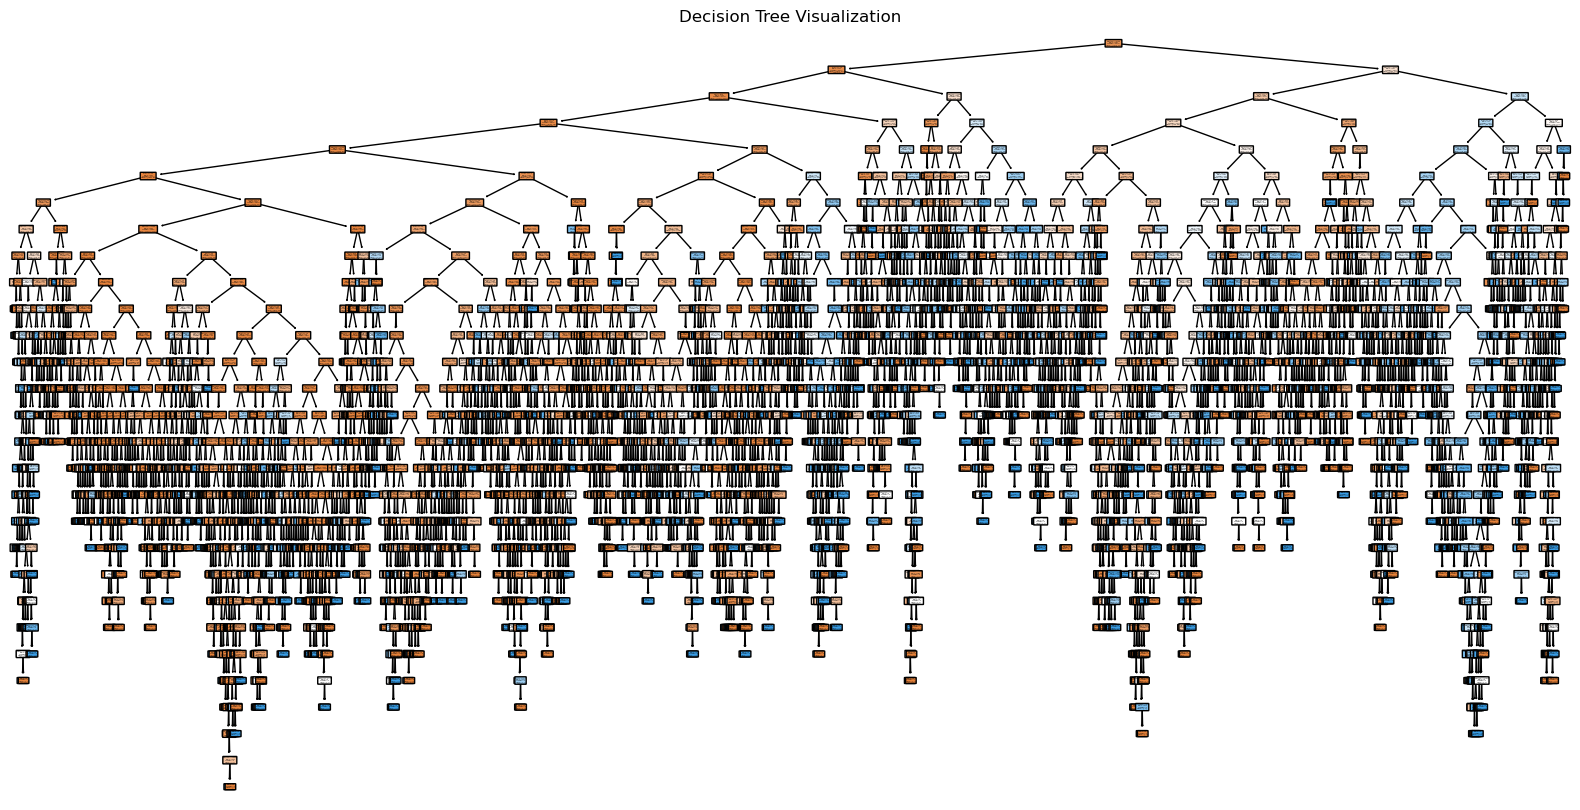

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Show a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize the Decision Tree
# Plot the decision tree to visualize its structure and decision rules
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

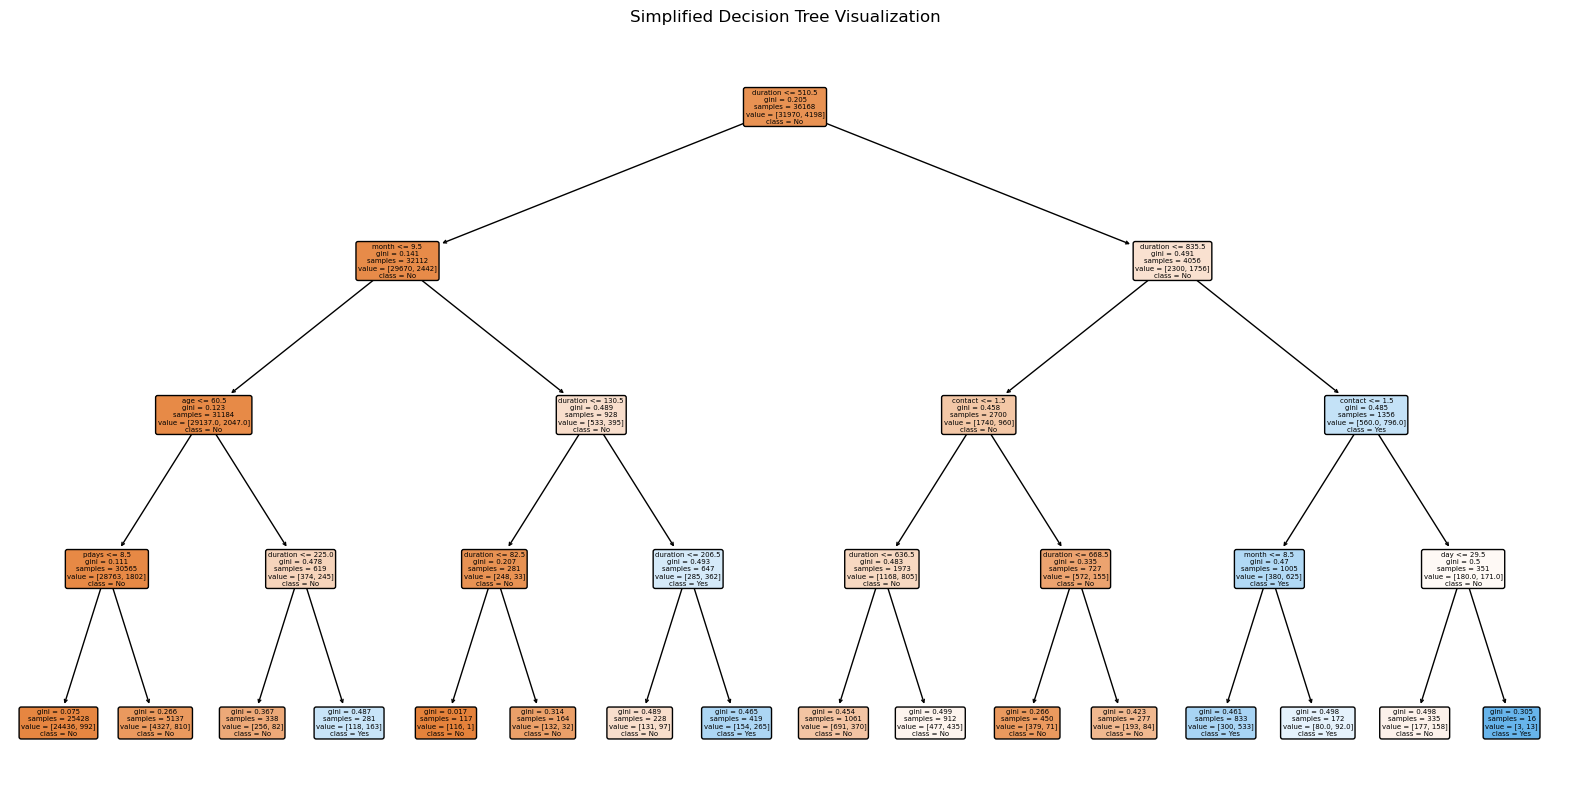

In [22]:
simplified_tree = DecisionTreeClassifier(random_state=42, max_depth=4)

# Train the simplified decision tree
simplified_tree.fit(X_train, y_train)

# Visualize the simplified decision tree
plt.figure(figsize=(20, 10))
plot_tree(simplified_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Simplified Decision Tree Visualization")
plt.show()